In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torch.nn as nn
import math
import random
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
import os


In [3]:
## Drawing straight lines ###
def draw_line(r, theta, length):
  return [[0] + [i*r*math.cos(theta)/length+r*(random.random()-0.5)*0.01 for i in range(1, length)], \
          [0] + [i*r*math.sin(theta)/length+r*(random.random()-0.5)*0.01 for i in range(1, length)]]

#Number of each to generate
class1 = 500 #Q3 to Q1
class2 = 500 #Q2 to Q4
length = 151
dim = 2

r1 = [50+random.random()*300 for i in range(0, class1)]
r2 = [50+random.random()*300 for i in range(0, class2)]

theta1 = [random.random()*3.14/2 for i in range(0, class1)]
theta2 = [3.14/2 + random.random()*3.14/2 for i in range(0, class2)]

lines1 = [draw_line(r1[i], theta1[i], length) for i in range(0, class1)]
lines2 = [draw_line(r2[i], theta2[i], length) for i in range(0, class2)]

labels = [0 for i in range(0, class1)] + [1 for i in range(0, class2)]

In [ ]:
## Drawing spirals ###
def draw_curved_line(class_num, theta, length):
    if class_num == 1:
        r = [150+i*random.random()*100/length for i in range(0, length)] #Big spiral
    else:
        r = [150+i*random.random()*100/length for i in range(0, length)] #Small spiral
    return [[0] + [(i*r[i])*math.cos(theta[i])/length+r[i]*(random.random()-0.5)*0.01 for i in range(1, length)], \
          [0] + [(i*r[i])*math.sin(theta[i])/length+r[i]*(random.random()-0.5)*0.01 for i in range(1, length)]]

#Number of each to generate
class1 = 5000 #Q3 to Q1
class2 = 5000 #Q2 to Q4
length = 151
rot_angle = 12*3.14
dim = 2


theta1 = [rot_angle*i/length for i in range(0, length)]
theta2 = [rot_angle - rot_angle*i/length for i in range(0, length)]


lines1 = [draw_curved_line(1, theta1, length) for i in range(0, class1)]
lines2 = [draw_curved_line(2, theta2, length) for i in range(0, class2)]
labels = [0 for i in range(0, class1)] + [1 for i in range(0, class2)]

In [28]:
## Drawing Spiral lines ###
def draw_spiral_line(class_num, theta, length):
    distance = [(i*1000+200*random.random())/length for i in range(0, length)]
    fixed_theta = random.random()*3.14/2
    r = [500+i*random.random()*10/length for i in range(0, length)]
    
    # if class_num == 1:
    #     distance = [(i*1000+200*random.random())/length for i in range(0, length)]
    #     fixed_theta = random.random()*3.14/2
    #     r = [500+i*random.random()*10/length for i in range(0, length)] #Big spiral
    # else:
    #     distance = [(i*1000+200*random.random())/length for i in range(0, length)]
    #     fixed_theta = random.random()*3.14/2
    #     r = [500+i*random.random()*10/length for i in range(0, length)] #Small spiral
    return [[0] + [(distance[i]*math.cos(fixed_theta)) + (i*r[i])*math.cos(theta[i])/length+r[i]*(random.random()-0.5)*0.01 for i in range(1, length)], \
          [0] + [(distance[i]*math.sin(fixed_theta)) + (i*r[i])*math.sin(theta[i])/length+r[i]*(random.random()-0.5)*0.01 for i in range(1, length)], \
          [0] + [distance[i]*0.5+r[i]*0.3 for i in range(1, length)]]

#Number of each to generate
class1 = 5000 #Q3 to Q1
class2 = 5000 #Q2 to Q4
length = 101
rot_angle = 4*3.14
dim = 2


theta1 = [rot_angle*i/length for i in range(0, length)]
theta2 = [rot_angle - rot_angle*i/length for i in range(0, length)]


lines1 = [draw_spiral_line(1, theta1, length) for i in range(0, class1)]
lines2 = [draw_spiral_line(2, theta2, length) for i in range(0, class2)]
labels = [0 for i in range(0, class1)] + [1 for i in range(0, class2)]

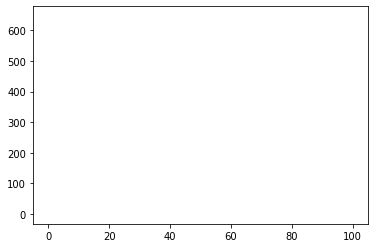

In [29]:
x=[i for i in range(0,length+1)]
for i in range(0,length):
  plt.plot(x[i],torch.tensor(lines1)[0][2][i])
plt.show() 

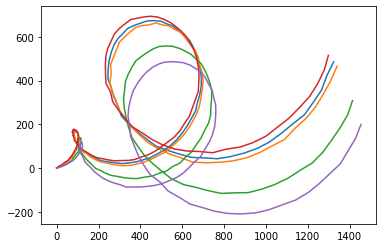

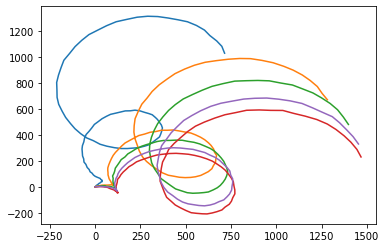

In [9]:
for i in range(0, 5):
    plt.plot(lines1[i][0], lines1[i][1])
plt.show()

for i in range(0, 5):
    plt.plot(lines2[i][0], lines2[i][1])

plt.show()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
def delta_maker(lines):
    delta_lines = []
    for line in lines:
        new_line = []
        for line_dim in line:
            delta = []
            for i, item in enumerate(line_dim):
                if i == 0:
                    prev = item
                    continue
                delta.append(item-prev)
                prev = item
            new_line.append(delta)
        delta_lines.append(new_line)
    return delta_lines

#lines1 = delta_maker(lines1)
#lines2 = delta_maker(lines2)

def rev_delta_cart_maker(lines):
    newlines = []
    for line in lines:
        new_line = []
        for line_dim in line:
            delta = [0]
            prev = 0
            for i, item in enumerate(line_dim):
                delta.append(item+prev)
                prev = item+prev
            new_line.append(delta)
        newlines.append(new_line)
    return newlines

In [ ]:
import math

def delta_cyli_maker(lines):
    delta_lines = []
    for i, line in enumerate(lines):
        r = []
        theta = []
        prev_r = 0
        prev_theta = 0
        theta_offset = 0
        for j in range(1, len(line[0])):
            r.append((line[0][j]**2 + line[1][j]**2)**0.5 - prev_r)
            prev_r = (line[0][j]**2 + line[1][j]**2)**0.5
            
            #We need to place checks to avoid jumps in theta...
            if math.atan2(line[1][j], line[0][j]) - prev_theta >= 2*3.14: #If the offset is greater than pi (-0.05pi -> 2pi)
                min_jump_amm = math.atan2(line[1][j], line[0][j]) - prev_theta
                for i in range(-2, 3):
                    if math.atan2(line[1][j], line[0][j]) - prev_theta + 2*3.14*i < min_jump_amm:
                        min_jump_amm = math.atan2(line[1][j], line[0][j]) - prev_theta + 2*3.14*i
                        theta_offset = 3.14*i
                    
            theta.append(math.atan2(line[1][j], line[0][j]) - prev_theta + 2*3.14*i)
            prev_theta = math.atan2(line[1][j], line[0][j])

        delta_lines.append([r, theta])
    return delta_lines

def rev_delta_cyli_maker(lines):
    newlines = []
    for i, line in enumerate(lines):
        x = [0]
        y = [0]
        prev_r = 0
        prev_theta = 0
        for j in range(0, len(line[0])):
            new_r = prev_r + line[0][j]
            new_theta = prev_theta + line[1][j]
            
            x.append(new_r * math.cos(new_theta))
            y.append(new_r * math.sin(new_theta))
            prev_r = new_r
            prev_theta = new_theta

        newlines.append([x, y])
    return newlines

In [ ]:
#lines1_mod = delta_cyli_maker(lines1)
#lines2_mod = delta_cyli_maker(lines2)
#replot1 = rev_delta_cyli_maker(lines1_mod)
#replot2 = rev_delta_cyli_maker(lines2_mod)

lines1_mod = delta_maker(lines1)
lines2_mod = delta_maker(lines2)
replot1 = rev_delta_cart_maker(lines1_mod)
replot2 = rev_delta_cart_maker(lines2_mod)

length = length - 1


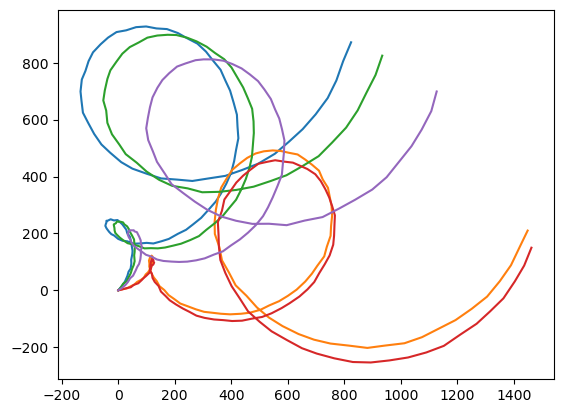

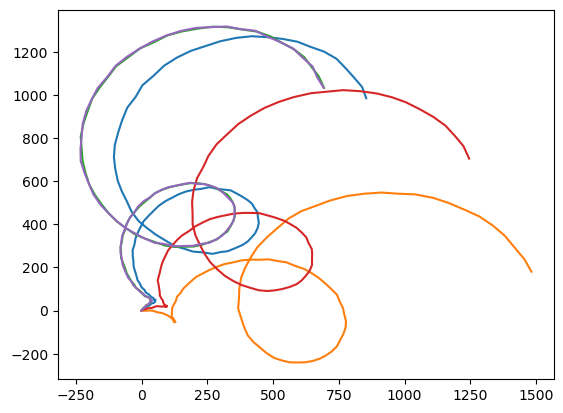

In [ ]:
for i in range(0, 5):
  plt.plot(replot1[i][0], replot1[i][1])
plt.show()

for i in range(0, 5):
  plt.plot(replot2[i][0], replot2[i][1])
plt.show()

In [ ]:
lines1_arr = torch.tensor(lines1_mod)
lines2_arr = torch.tensor(lines2_mod)
features_vec = torch.cat((lines1_arr,lines2_arr),0)

labels_vec = torch.tensor(labels)

In [ ]:
input_dim = 4
n_classes = 2
out_shape = (length,dim)
output_dim = length*dim
bsize = 100
test_size = 12

cuda = True if torch.cuda.is_available() else False


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.noise1 = nn.Sequential(
            nn.Linear((3*dim)**2, 400),
            nn.BatchNorm1d(400),
            nn.ReLU()
        )

        self.noise2 = nn.Sequential(
            nn.Linear(400, 1300),
            nn.BatchNorm1d(1300),
            nn.ReLU(),
        )

        self.label1 = nn.Sequential(
            nn.Linear(n_classes, 10),
            nn.BatchNorm1d(10),
            nn.ReLU()
        )

        self.label2 = nn.Sequential(
            nn.Linear(10, 200),
            nn.BatchNorm1d(200),
            nn.ReLU(),
        )
        
        self.hidden_layer3 = nn.Sequential(
            nn.Conv1d(dim, dim*10, 5, stride = 1, padding = 2),
            nn.Linear(int(1500/dim), 200),
            nn.Upsample(scale_factor = 2, mode='linear'),
            nn.BatchNorm1d(dim*10, affine=False),
            nn.ReLU()
        )
        
        self.hidden_layer4 = nn.Sequential(
            nn.Conv1d(dim*10, dim*5, 5, stride = 1, padding = 2),
            nn.Linear(400, 100),
            nn.Upsample(scale_factor = 2, mode='linear'),
            nn.BatchNorm1d(dim*5, affine=False),
            nn.ReLU()
        )

        self.hidden_layer5 = nn.Sequential(
            nn.Conv1d(dim*5, dim*1, 5, stride = 1, padding = 2),
            nn.Linear(200, length),
        )

    def forward(self, noise, labels):        
        c = nn.functional.one_hot(labels, num_classes = n_classes).to(torch.float32)
        noise = noise.flatten(start_dim=1)
        
        n_output = self.noise1(noise)
        n_output = self.noise2(n_output)
        
        l_output = self.label1(c)
        l_output = self.label2(l_output)
        
        inp = torch.cat([n_output, l_output], 1)
        output = inp.reshape(len(labels), dim, -1)
        
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        output = self.hidden_layer5(output)

        return output
      

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(length, 200),
            nn.Conv1d(dim, dim*20, 5, stride = 1, padding = 2),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )
        self.hidden_layer2 = nn.Sequential(
            nn.Conv1d(dim*20, dim*5, 5, stride = 1, padding = 2),
            nn.Linear(200, 150),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Conv1d(dim*5, dim, 5, stride = 1, padding = 2),
            nn.Linear(150, 50),
            nn.LeakyReLU(0.05),
            nn.Dropout(0.05)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(50*2 + n_classes, 30),
            nn.LeakyReLU(0.05),
            #nn.Dropout(0.2)
        )
        
        self.hidden_layer5 = nn.Sequential(
            nn.Linear(30, 1),
            nn.Sigmoid()
        )
        

    def forward(self, inp, labels):
        c = nn.functional.one_hot(labels, num_classes = n_classes)
        inp = inp.reshape(-1, dim, length)
        output = self.layer1(inp)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        
        #Flatten layer occurs here
        output = torch.cat([output.flatten(start_dim=1), c], 1)
        output = output[:, None,:]
        output = self.hidden_layer4(output)
        output = self.hidden_layer5(output)
        
        output = output.squeeze(-1)
        return output.to(device)
        # Concatenate label embedding and image to produce input
        # d_in = torch.cat((inp.view(inp.size(0), -1), self.label_embedding(labels)), -1).flatten().long()
        # print(d_in.shape)
        # validity = self.model(d_in)
        # return validity

In [ ]:
print(features_vec.shape)
print(labels_vec.shape)
dataset = TensorDataset(features_vec,labels_vec)
loader = DataLoader(dataset,batch_size=bsize)


torch.Size([10000, 2, 100])
torch.Size([10000])


In [ ]:
adversarial_loss = torch.nn.BCELoss()
generator = Generator()
discriminator = Discriminator()

if str(device) == "cuda":
    print("GPU Enabled")
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0001, betas=(0.5,0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0001, betas=(0.5,0.999))

GPU Enabled


In [ ]:
def plot_figures(generated_data, noise_labels):
    plt.figure(1)
    plt.clf()
    plt.figure(2)
    plt.clf()
    
    for i, raw_data in enumerate(generated_data):
        data = raw_data.detach().tolist()
        x = data[0]
        y = data[1]
        fixed_track = rev_delta_cart_maker([[x, y]])
        if noise_labels[i].item() == 0:
            plt.figure(1)
            plt.plot(fixed_track[0][0],fixed_track[0][1])
        else:
            plt.figure(2)
            plt.plot(fixed_track[0][0],fixed_track[0][1])
    plt.figure(1)
    plt.show()
    plt.figure(2)
    plt.show()


[0/2500]: loss_d: 0.442, loss_g: 0.825
[5/2500]: loss_d: 0.186, loss_g: 3.102
[10/2500]: loss_d: 0.426, loss_g: 1.157
[15/2500]: loss_d: 0.488, loss_g: 1.413
[20/2500]: loss_d: 0.440, loss_g: 1.487
[25/2500]: loss_d: 0.650, loss_g: 1.046
[30/2500]: loss_d: 0.178, loss_g: 3.481
[35/2500]: loss_d: 0.180, loss_g: 3.309
[40/2500]: loss_d: 0.185, loss_g: 2.973
[45/2500]: loss_d: 0.198, loss_g: 2.525


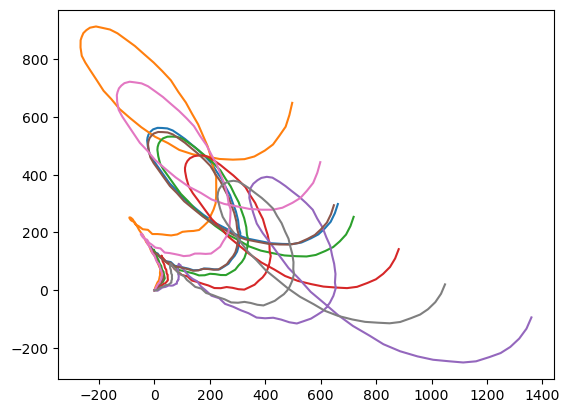

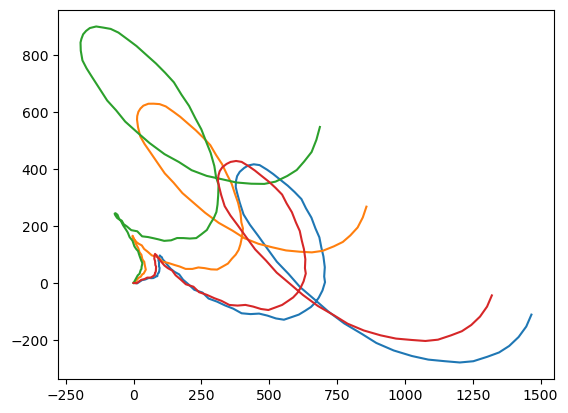

<Figure size 640x480 with 0 Axes>

[50/2500]: loss_d: 0.189, loss_g: 2.841
[55/2500]: loss_d: 0.184, loss_g: 3.038
[60/2500]: loss_d: 0.183, loss_g: 3.142
[65/2500]: loss_d: 0.191, loss_g: 2.778
[70/2500]: loss_d: 0.184, loss_g: 3.015
[75/2500]: loss_d: 0.182, loss_g: 3.174
[80/2500]: loss_d: 0.183, loss_g: 3.044
[85/2500]: loss_d: 0.186, loss_g: 3.016
[90/2500]: loss_d: 0.182, loss_g: 3.098
[95/2500]: loss_d: 0.187, loss_g: 2.907


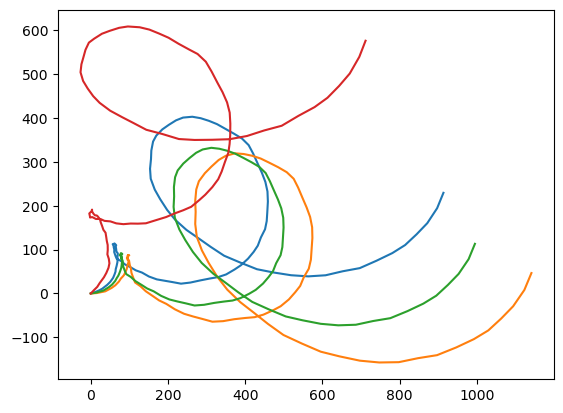

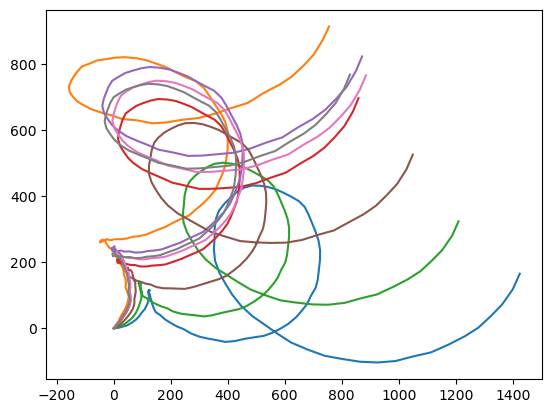

<Figure size 640x480 with 0 Axes>

[100/2500]: loss_d: 0.191, loss_g: 2.873
[105/2500]: loss_d: 0.189, loss_g: 2.953
[110/2500]: loss_d: 0.186, loss_g: 3.082
[115/2500]: loss_d: 0.604, loss_g: 0.983
[120/2500]: loss_d: 0.950, loss_g: 1.048
[125/2500]: loss_d: 0.619, loss_g: 0.879
[130/2500]: loss_d: 0.691, loss_g: 0.649
[135/2500]: loss_d: 0.771, loss_g: 0.988
[140/2500]: loss_d: 0.564, loss_g: 0.859
[145/2500]: loss_d: 0.794, loss_g: 1.121


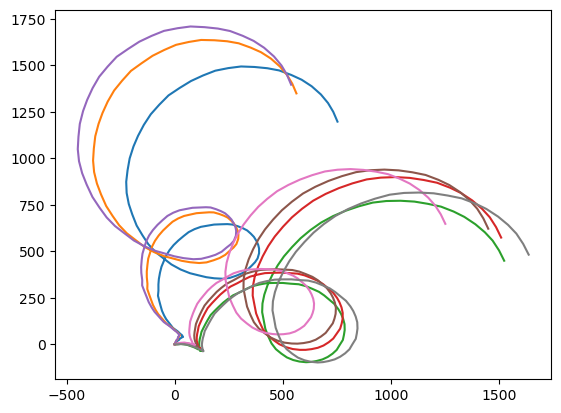

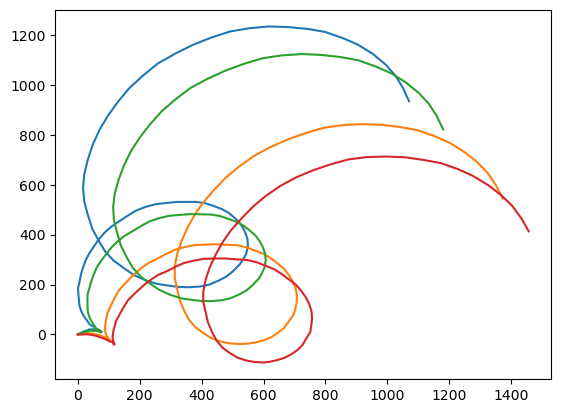

<Figure size 640x480 with 0 Axes>

[150/2500]: loss_d: 0.717, loss_g: 0.804
[155/2500]: loss_d: 0.699, loss_g: 1.151
[160/2500]: loss_d: 0.519, loss_g: 1.363
[165/2500]: loss_d: 0.335, loss_g: 1.542
[170/2500]: loss_d: 0.608, loss_g: 0.776
[175/2500]: loss_d: 0.531, loss_g: 1.198
[180/2500]: loss_d: 0.540, loss_g: 1.068
[185/2500]: loss_d: 0.508, loss_g: 1.537
[190/2500]: loss_d: 0.467, loss_g: 1.344
[195/2500]: loss_d: 0.458, loss_g: 1.403


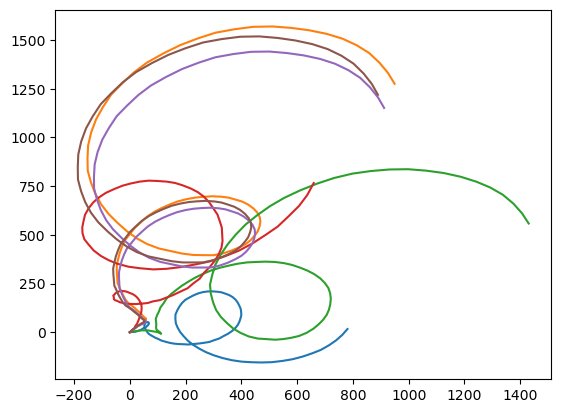

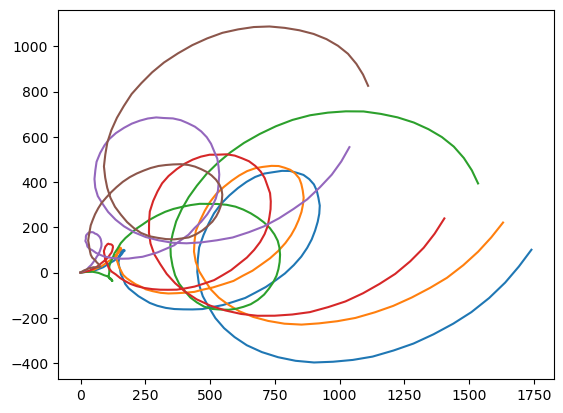

<Figure size 640x480 with 0 Axes>

[200/2500]: loss_d: 0.435, loss_g: 1.548
[205/2500]: loss_d: 0.420, loss_g: 1.470
[210/2500]: loss_d: 0.405, loss_g: 1.445
[215/2500]: loss_d: 0.353, loss_g: 1.545
[220/2500]: loss_d: 0.428, loss_g: 1.868
[225/2500]: loss_d: 0.467, loss_g: 1.368
[230/2500]: loss_d: 0.374, loss_g: 1.877
[235/2500]: loss_d: 0.390, loss_g: 1.673
[240/2500]: loss_d: 0.335, loss_g: 1.751
[245/2500]: loss_d: 0.369, loss_g: 1.693


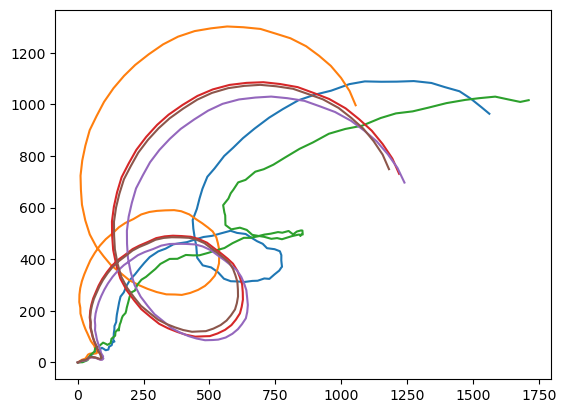

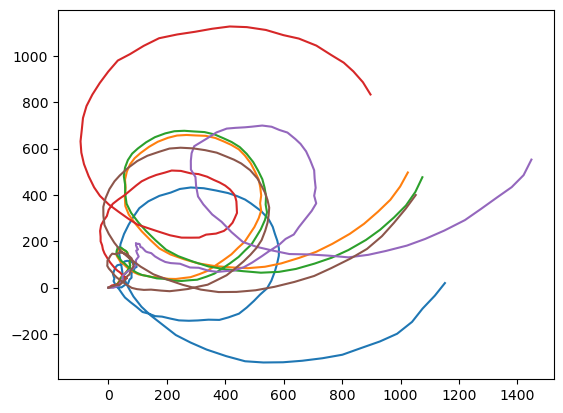

<Figure size 640x480 with 0 Axes>

[250/2500]: loss_d: 0.467, loss_g: 1.737
[255/2500]: loss_d: 0.429, loss_g: 1.440
[260/2500]: loss_d: 0.464, loss_g: 1.298
[265/2500]: loss_d: 0.543, loss_g: 1.425
[270/2500]: loss_d: 0.562, loss_g: 1.135
[275/2500]: loss_d: 0.554, loss_g: 1.374
[280/2500]: loss_d: 0.511, loss_g: 1.704
[285/2500]: loss_d: 0.542, loss_g: 1.201
[290/2500]: loss_d: 0.560, loss_g: 1.015
[295/2500]: loss_d: 0.594, loss_g: 1.243


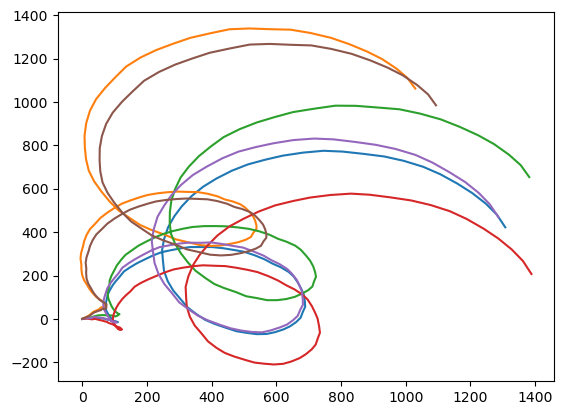

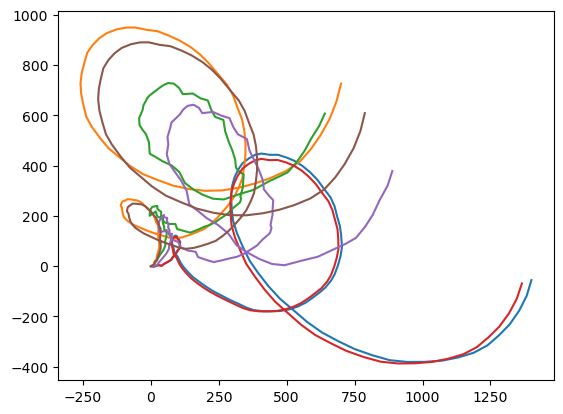

<Figure size 640x480 with 0 Axes>

[300/2500]: loss_d: 0.507, loss_g: 1.276
[305/2500]: loss_d: 0.204, loss_g: 2.960
[310/2500]: loss_d: 0.185, loss_g: 3.519
[315/2500]: loss_d: 0.179, loss_g: 3.778
[320/2500]: loss_d: 0.186, loss_g: 3.410
[325/2500]: loss_d: 0.170, loss_g: 5.029
[330/2500]: loss_d: 0.170, loss_g: 4.855
[335/2500]: loss_d: 0.377, loss_g: 1.452
[340/2500]: loss_d: 0.391, loss_g: 1.416
[345/2500]: loss_d: 0.174, loss_g: 4.687


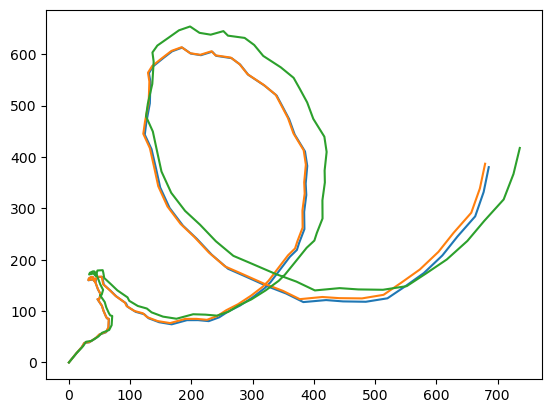

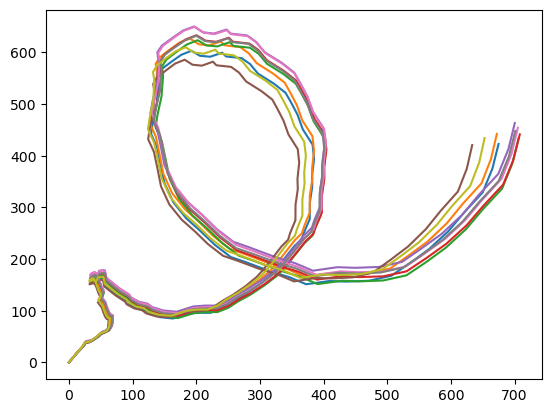

<Figure size 640x480 with 0 Axes>

[350/2500]: loss_d: 0.188, loss_g: 4.026
[355/2500]: loss_d: 0.179, loss_g: 3.683
[360/2500]: loss_d: 0.179, loss_g: 4.001
[365/2500]: loss_d: 0.180, loss_g: 3.897
[370/2500]: loss_d: 0.170, loss_g: 4.671
[375/2500]: loss_d: 0.335, loss_g: 1.695
[380/2500]: loss_d: 0.517, loss_g: 1.141
[385/2500]: loss_d: 0.541, loss_g: 1.164
[390/2500]: loss_d: 0.559, loss_g: 1.125
[395/2500]: loss_d: 0.482, loss_g: 1.597


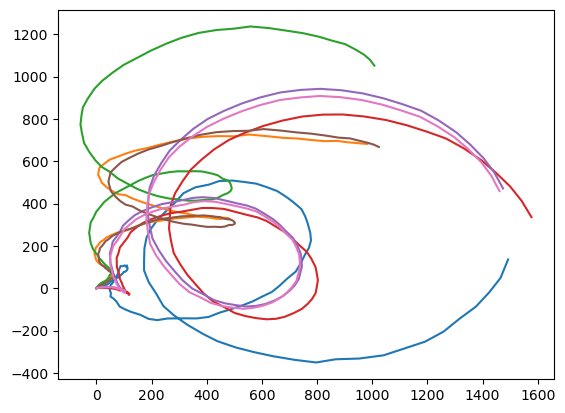

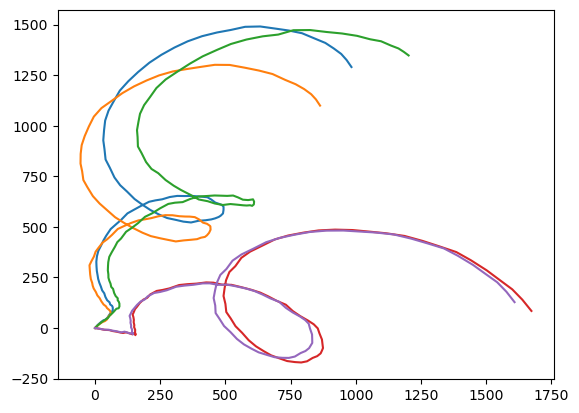

<Figure size 640x480 with 0 Axes>

[400/2500]: loss_d: 0.411, loss_g: 2.192
[405/2500]: loss_d: 0.452, loss_g: 1.872
[410/2500]: loss_d: 0.362, loss_g: 2.115
[415/2500]: loss_d: 0.361, loss_g: 2.312
[420/2500]: loss_d: 0.442, loss_g: 1.922
[425/2500]: loss_d: 0.454, loss_g: 1.580
[430/2500]: loss_d: 0.510, loss_g: 2.001
[435/2500]: loss_d: 0.465, loss_g: 1.897
[440/2500]: loss_d: 0.581, loss_g: 1.421
[445/2500]: loss_d: 0.630, loss_g: 1.150


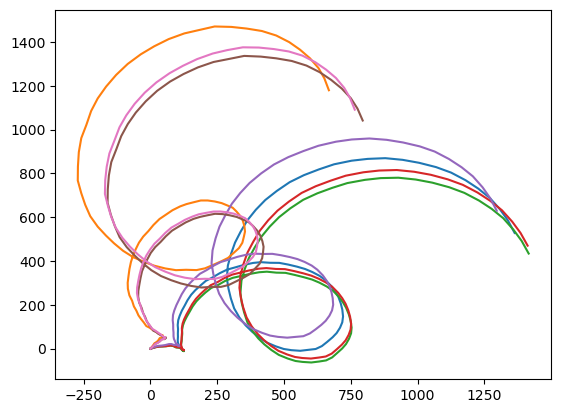

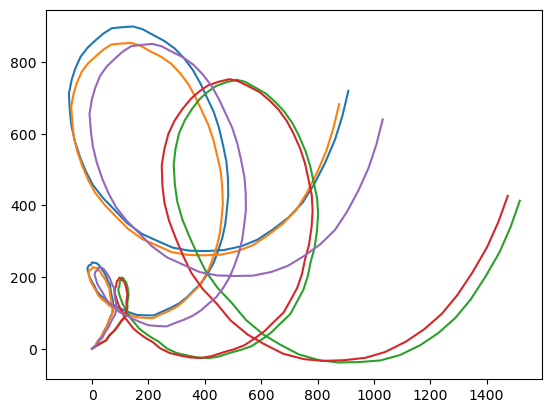

<Figure size 640x480 with 0 Axes>

[450/2500]: loss_d: 0.499, loss_g: 1.497
[455/2500]: loss_d: 0.400, loss_g: 1.900
[460/2500]: loss_d: 0.439, loss_g: 1.538
[465/2500]: loss_d: 0.372, loss_g: 1.642
[470/2500]: loss_d: 0.448, loss_g: 1.622
[475/2500]: loss_d: 0.558, loss_g: 1.414
[480/2500]: loss_d: 0.455, loss_g: 1.543
[485/2500]: loss_d: 0.491, loss_g: 1.435
[490/2500]: loss_d: 0.459, loss_g: 1.379
[495/2500]: loss_d: 0.455, loss_g: 1.555


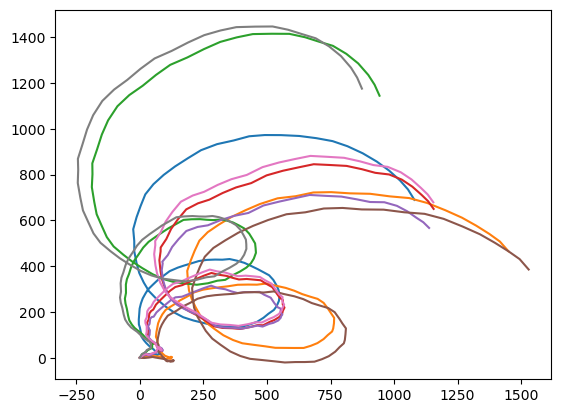

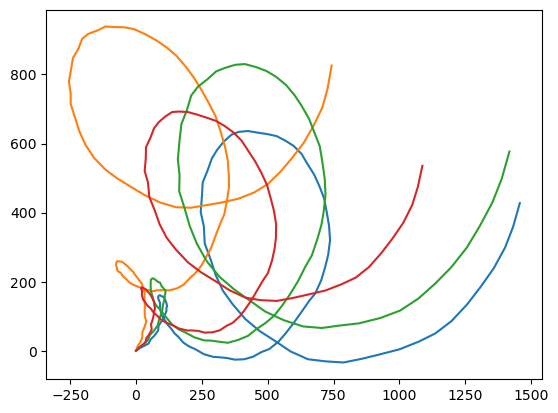

<Figure size 640x480 with 0 Axes>

[500/2500]: loss_d: 0.351, loss_g: 1.586
[505/2500]: loss_d: 0.322, loss_g: 2.275
[510/2500]: loss_d: 0.453, loss_g: 1.452
[515/2500]: loss_d: 0.495, loss_g: 1.384
[520/2500]: loss_d: 0.486, loss_g: 1.483
[525/2500]: loss_d: 0.452, loss_g: 1.415
[530/2500]: loss_d: 0.414, loss_g: 1.235
[535/2500]: loss_d: 0.545, loss_g: 1.388
[540/2500]: loss_d: 0.492, loss_g: 1.467
[545/2500]: loss_d: 0.419, loss_g: 1.733


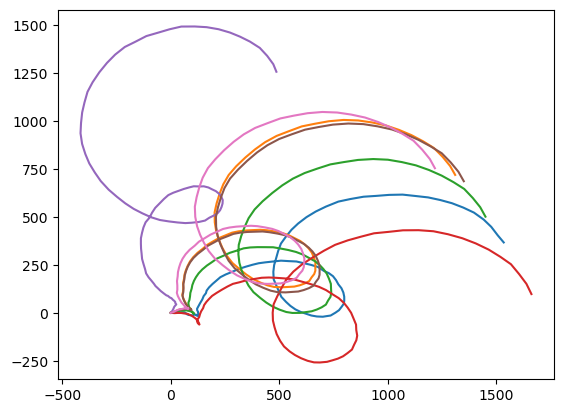

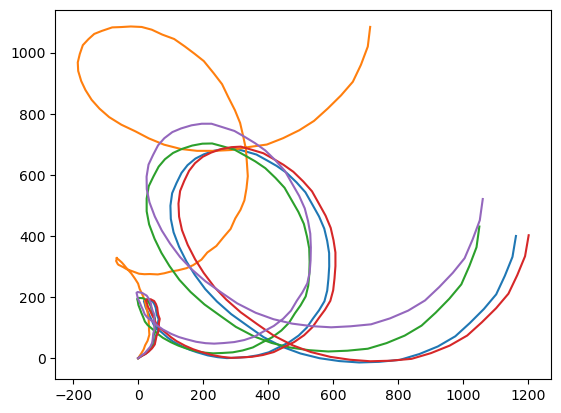

<Figure size 640x480 with 0 Axes>

[550/2500]: loss_d: 0.462, loss_g: 1.658
[555/2500]: loss_d: 0.493, loss_g: 1.630
[560/2500]: loss_d: 0.500, loss_g: 1.452
[565/2500]: loss_d: 0.484, loss_g: 1.501
[570/2500]: loss_d: 0.433, loss_g: 1.439
[575/2500]: loss_d: 0.528, loss_g: 1.585
[580/2500]: loss_d: 0.508, loss_g: 1.529
[585/2500]: loss_d: 0.600, loss_g: 1.260
[590/2500]: loss_d: 0.505, loss_g: 1.275
[595/2500]: loss_d: 0.376, loss_g: 1.688


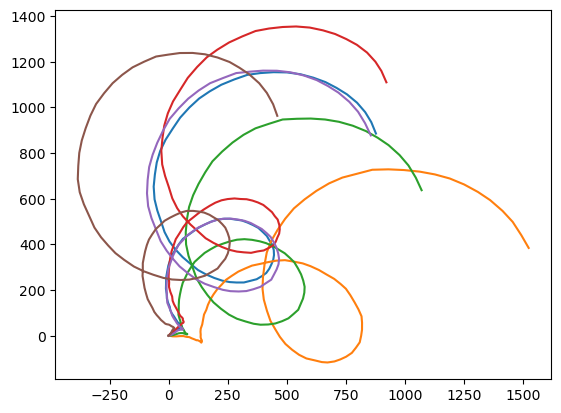

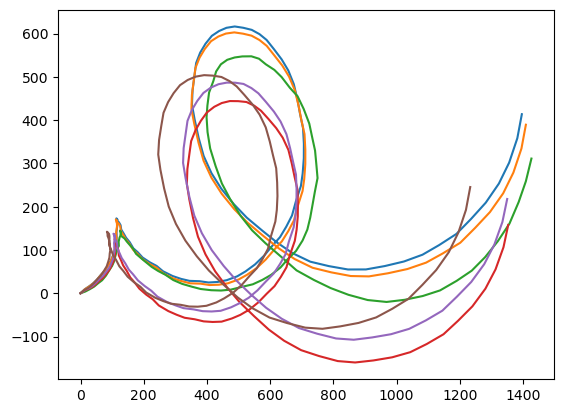

<Figure size 640x480 with 0 Axes>

[600/2500]: loss_d: 0.528, loss_g: 1.497
[605/2500]: loss_d: 0.533, loss_g: 1.444
[610/2500]: loss_d: 0.588, loss_g: 1.399
[615/2500]: loss_d: 0.480, loss_g: 1.292
[620/2500]: loss_d: 0.472, loss_g: 1.488
[625/2500]: loss_d: 0.482, loss_g: 1.649
[630/2500]: loss_d: 0.473, loss_g: 1.481
[635/2500]: loss_d: 0.497, loss_g: 1.277
[640/2500]: loss_d: 0.527, loss_g: 1.504
[645/2500]: loss_d: 0.441, loss_g: 1.358


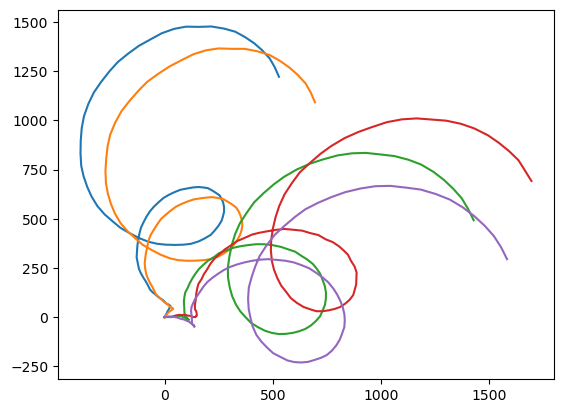

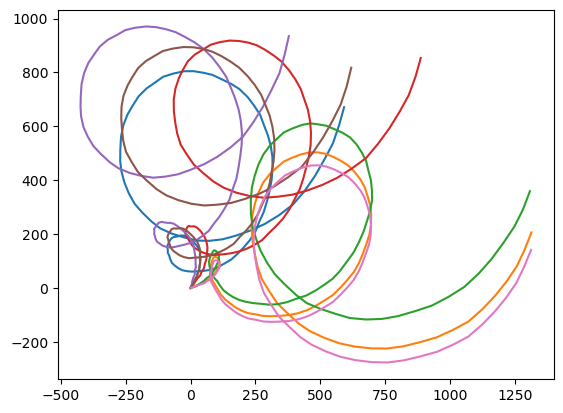

<Figure size 640x480 with 0 Axes>

[650/2500]: loss_d: 0.597, loss_g: 1.290
[655/2500]: loss_d: 0.465, loss_g: 1.514
[660/2500]: loss_d: 0.530, loss_g: 1.305
[665/2500]: loss_d: 0.415, loss_g: 1.599
[670/2500]: loss_d: 0.573, loss_g: 1.243
[675/2500]: loss_d: 0.367, loss_g: 1.429
[680/2500]: loss_d: 0.420, loss_g: 1.380
[685/2500]: loss_d: 0.480, loss_g: 1.319
[690/2500]: loss_d: 0.459, loss_g: 1.516
[695/2500]: loss_d: 0.426, loss_g: 1.661


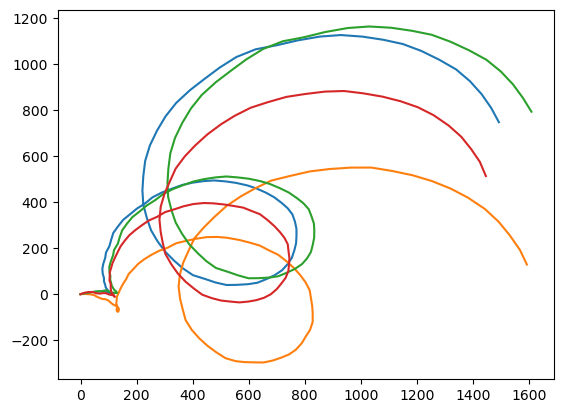

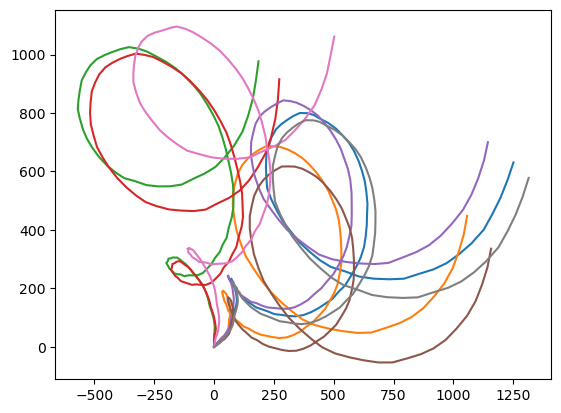

<Figure size 640x480 with 0 Axes>

[700/2500]: loss_d: 0.523, loss_g: 1.179
[705/2500]: loss_d: 0.447, loss_g: 1.504
[710/2500]: loss_d: 0.506, loss_g: 1.341
[715/2500]: loss_d: 0.424, loss_g: 1.425
[720/2500]: loss_d: 0.453, loss_g: 1.923
[725/2500]: loss_d: 0.404, loss_g: 1.683
[730/2500]: loss_d: 0.386, loss_g: 1.858
[735/2500]: loss_d: 0.551, loss_g: 1.447
[740/2500]: loss_d: 0.429, loss_g: 1.439
[745/2500]: loss_d: 0.534, loss_g: 1.542


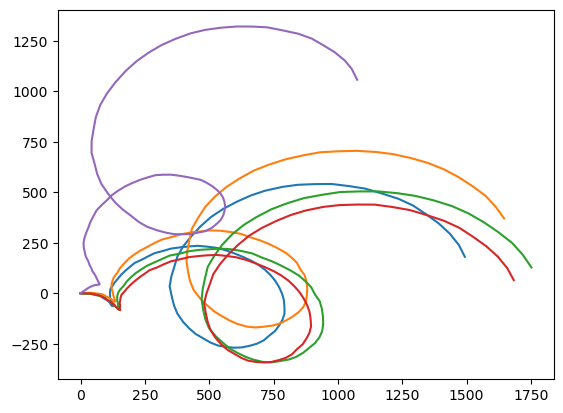

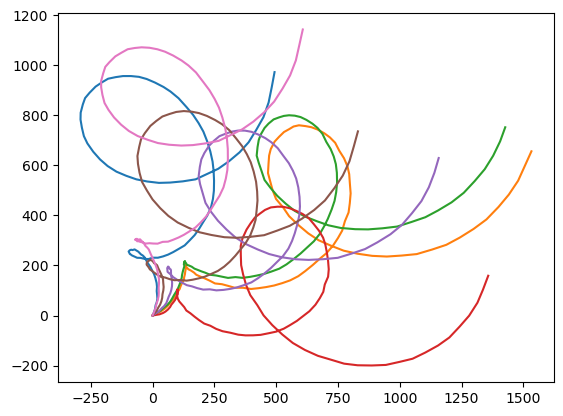

<Figure size 640x480 with 0 Axes>

[750/2500]: loss_d: 0.476, loss_g: 1.295


KeyboardInterrupt: 

In [ ]:
n_epochs = 2500

FloatTensor = torch.cuda.FloatTensor if device == "cuda" else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if device == "cuda" else torch.LongTensor

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(loader):
        #Adversarial ground truths
        valid = torch.autograd.Variable(FloatTensor(bsize, 1).fill_(0.9), requires_grad=False).to(device)
        fake = torch.autograd.Variable(FloatTensor(bsize, 1).fill_(0.0), requires_grad=False).to(device)
        
        #Real Input
        real_tracks = data_input[0]
        real_labels = data_input[1]
                
        ### Training Generator ###
        optimizer_G.zero_grad()

        noise = torch.randn((bsize, 3*dim, 3*dim)).to(device)
        noise_labels = torch.randint(0, 2, (bsize,)).to(device)
        generated_data = generator(noise, noise_labels)
        
        #Update the generator loss function based on its ability to trick
        validity = discriminator(generated_data, noise_labels)
        g_loss = adversarial_loss(validity, valid)
        
        g_loss.backward()
        optimizer_G.step()
        
        ### Training Discriminator ###
        
        mreal_track = real_tracks.to(device) 
        mreal_labels = real_labels.to(device)
        
        # Clear optimizer gradients        
        optimizer_D.zero_grad()
        # Forward pass with true data as input
        validity_real = discriminator(mreal_track,mreal_labels)
        d_real_loss = adversarial_loss(validity_real, valid)
        validity_fake = discriminator(generated_data.detach(),noise_labels)
        d_fake_loss = adversarial_loss(validity_fake, fake)

        # Average the loss
        d_loss = (
            d_real_loss + d_fake_loss
        ) / 2
        
        d_loss.backward()
        #print(d_loss)
        if d_loss.data.item() > 0.15:
            optimizer_D.step()
        #optimizer_D.step()
        
        # Clear optimizer gradients

        G_loss.append(g_loss.data.item())
        # Evaluate the model
    if (epoch_idx)%50 == 49:

        with torch.no_grad():
            noise = torch.randn((test_size, 3*dim, 3*dim)).to(device) #Do only ten examples
            noise_labels = torch.randint(0, 2, (test_size,)).to(device)
            generated_data = generator(noise, noise_labels)
            
            plot_figures(generated_data, noise_labels)

    if (epoch_idx)%5 == 0:
        print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(d_loss.to("cpu"))), torch.mean(torch.FloatTensor(g_loss.to("cpu")))))

In [ ]:
validity = discriminator(generated_data, noise_labels)
#validity = discriminator(mreal_track,mreal_labels)
print(validity.tolist())

In [ ]:
true_data